In [129]:
# pyplot for plotting
from matplotlib import pyplot as plt
# numpy for vectorized array operations
import numpy as np
# pandas for proper tabular manipulation
import pandas as pd
# scipy stats for our subversions
from scipy import stats
import env

In [132]:
# A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars.
# Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

lamda = 2
car_dist = stats.poisson(lamda)
domain = [n for n in range(13)]
prob = [car_dist.pmf(n) for n in domain]

<BarContainer object of 13 artists>

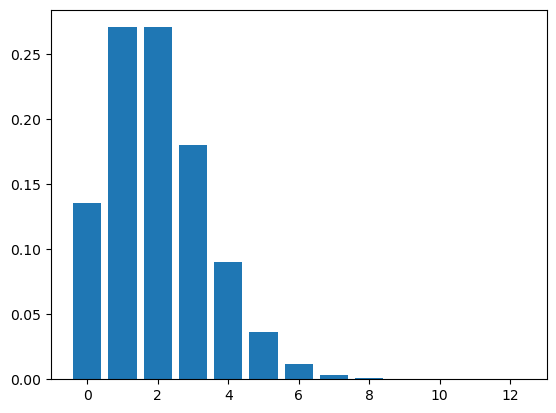

In [133]:
plt.bar(domain, prob)

In [134]:
# What is the probability that no cars drive up in the noon hour?
car_dist.pmf(0)

0.1353352832366127

In [135]:
# What is the probability that 3 or more cars come through the drive through?
car_dist.sf(2)

0.32332358381693654

In [141]:
# How likely is it that the drive through gets at least 1 car?
car_dist.sf(0)

0.8646647167633873

In [142]:
# Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:
n = 3.0
p = 0.3
grades = stats.norm(n,p)

In [144]:
# What grade point average is required to be in the top 5% of the graduating class?
grades.isf(.05)

3.4934560880854417

In [146]:
# What GPA constitutes the bottom 15% of the class?
grades.ppf(.15)

2.689069983151863

In [148]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. 
# Would a student with a 2.8 grade point average qualify for this scholarship?
grades.ppf([.2, .3])
# yes

array([2.74751363, 2.84267985])

In [32]:
# If I have a GPA of 3.5, what percentile am I in?
grades.pdf(3.5)

0.3315904626424956

In [160]:
# A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. 
# How likely is it that this many people or more click through?
n = 4326
k = 97
p = .02
click = stats.binom(n,p)

click.pmf(97)



0.021942930454375544

In [98]:
# You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. 
# Looking to save time, you put down random probabilities as the answer to each question.
answer = stats.randint(1,61)
answer.pmf(60)
# What is the probability that at least one of your first 60 answers is correct?

0.016666666666666666

In [102]:
# The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one 
# student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of
#  22 students visit the break area.
round(66*.9)


59

In [156]:
#  How likely is it that the break area gets cleaned up each day? 
lamda = .03
cleaner = stats.poisson(lamda)
cleaner.sf(0)

0.029554466451491814

In [157]:
# How likely is it that it goes two days without getting cleaned up?
cleaner.pmf(0)

0.9704455335485082

In [158]:
# All week?
cleaner.pmf(7)

4.2110404402194286e-15

In [122]:
# You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
# After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is 
# normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, 
# and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 
# Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

# 15 is 31.25 percent of the 48 minutes left
mu = 15
sigma = 3
people = stats.norm(mu,sigma)
people.cdf(31.25)


0.9999999696398052

In [121]:
# Connect to the employees database and find the average salary of current employees, along with the standard deviation. 
# For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by 
# the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

# Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: 
# your .gitignore, your env.py, and to use pd.read_sql. 
# Copy over your .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database like so:
import pandas as pd
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'  
pd.read_sql('SELECT * FROM salaries', url)


,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
...,...,...,...,...
2844042,499999,63707,1997-11-30,1998-11-30
2844043,499999,67043,1998-11-30,1999-11-30
2844044,499999,70745,1999-11-30,2000-11-29
2844045,499999,74327,2000-11-29,2001-11-29


In [126]:
# What percent of employees earn less than 60,000?
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'  
pd.read_sql('SELECT * FROM salaries WHERE salary < 60000;', url)
print((1348032/2844047)*100)


47.39837281170107


In [127]:
# What percent of employees earn more than 95,000?
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'  
pd.read_sql('SELECT * FROM salaries WHERE salary > 95000;', url)
print((152319/2844047)*100)

5.355713179142257


In [128]:
# What percent of employees earn between 65,000 and 80,000?
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'  
pd.read_sql('SELECT * FROM salaries WHERE salary BETWEEN 65000 AND 80000;', url)
print((691979/2844047)*100)

24.330786375893226


In [164]:
# What do the top 5% of employees make?
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''
SELECT *
FROM salaries s
WHERE s.to_date > NOW()
'''
salaries = pd.read_sql(query, url)
sal_stats = salaries.salary.agg(['std','mean'])
sal_stats['std']
sal_stats['mean']
sal_distribution = stats.norm(sal_stats['mean'], sal_stats['std'])
sal_distribution.isf(0.05)


100484.64454102777